In [1]:
import numpy as np
import matplotlib.pyplot as plt

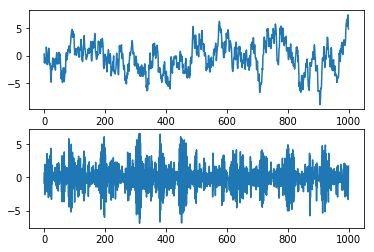

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

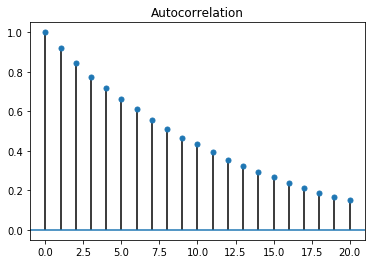

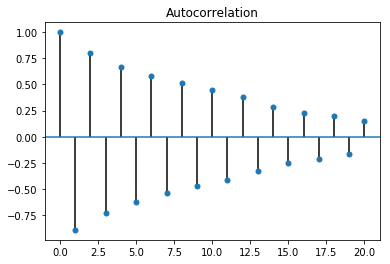

In [8]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

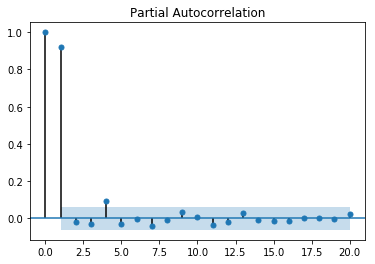

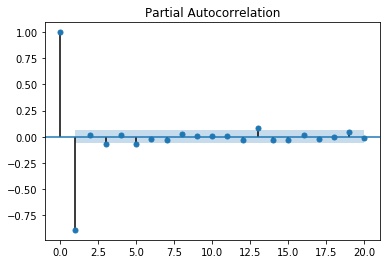

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data_1, lags=20)
plt.show()
plot_pacf(simulated_data_2, lags=20)
plt.show()

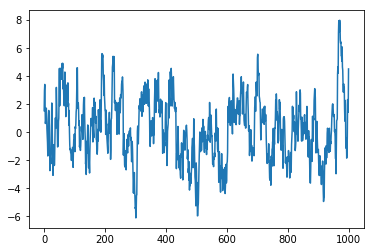

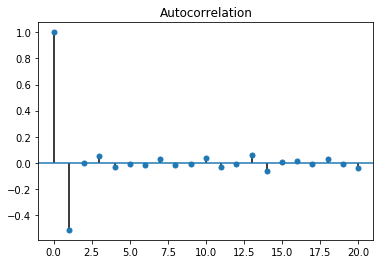

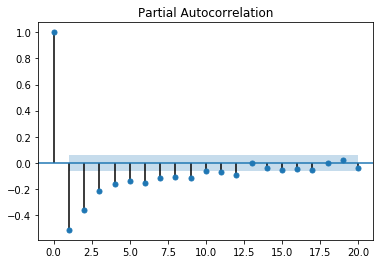

In [6]:
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_3 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()
plot_pacf(simulated_data_3, lags=20)
plt.show()

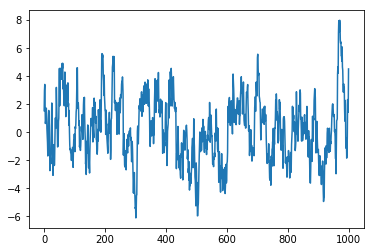

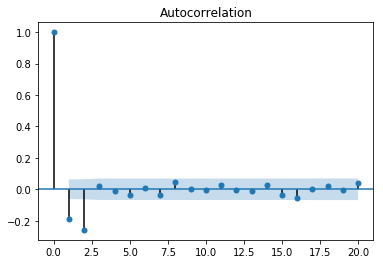

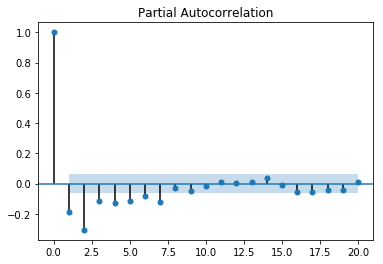

In [8]:
ar1 = np.array([1])
ma1 = np.array([1, -0.9,-0.5])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_4 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()
plot_acf(simulated_data_4, alpha=0.05, lags=20)
plt.show()
plot_pacf(simulated_data_4, lags=20)
plt.show()

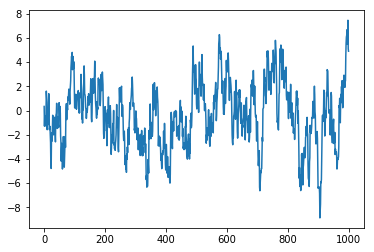

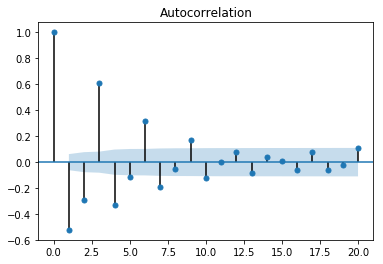

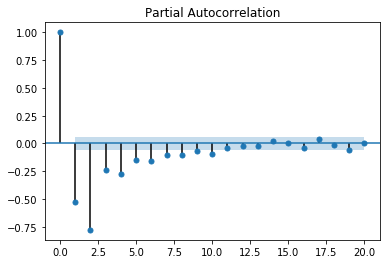

In [9]:
ar1 = np.array([1,0.9,0.7])
ma1 = np.array([1, -0.9,-0.5])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_5 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()
plot_acf(simulated_data_5, alpha=0.05, lags=20)
plt.show()
plot_pacf(simulated_data_5, lags=20)
plt.show()

In [10]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data_5, order=(2,2))
res = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [ ]:
mod = sm.tsa.statespace.SARIMAX(df.riders, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print results.summary()

In [13]:
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1645.622
Method:                       css-mle   S.D. of innovations              1.252
Date:                Mon, 16 Apr 2018   AIC                           3303.244
Time:                        21:10:27   BIC                           3332.691
Sample:                             0   HQIC                          3314.436
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.004      0.034      0.973      -0.008       0.008
ar.L1.y       -0.8831      0.035    -25.113      0.000      -0.952      -0.814
ar.L2.y       -0.6764      0.024    -28.000      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


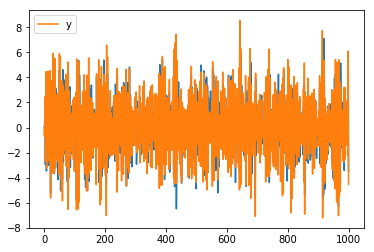

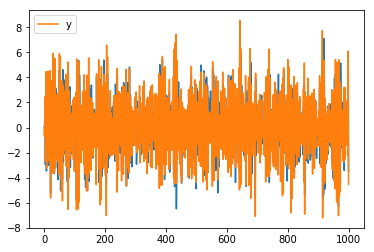

In [20]:
res.plot_predict()

In [26]:
len(res.predict())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1000

In [24]:
len(simulated_data_5)

1000

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(simulated_data_5, res.predict())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1.5699358099833234

In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)